# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Reviews-Solicitation" data-toc-modified-id="Reviews-Solicitation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Reviews Solicitation</a></div><div class="lev2 toc-item"><a href="#Bayesian-Inference" data-toc-modified-id="Bayesian-Inference-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Bayesian Inference</a></div><div class="lev2 toc-item"><a href="#Binomial-Data,-Beta-Prior" data-toc-modified-id="Binomial-Data,-Beta-Prior-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Binomial Data, Beta Prior</a></div><div class="lev3 toc-item"><a href="#Toy-Example" data-toc-modified-id="Toy-Example-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Toy Example</a></div><div class="lev2 toc-item"><a href="#Multinomial-Data---Multi-level-Ratings" data-toc-modified-id="Multinomial-Data---Multi-level-Ratings-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Multinomial Data - Multi-level Ratings</a></div><div class="lev3 toc-item"><a href="#Toy-example" data-toc-modified-id="Toy-example-131"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Toy example</a></div><div class="lev2 toc-item"><a href="#Open-for-discussion" data-toc-modified-id="Open-for-discussion-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Open for discussion</a></div><div class="lev3 toc-item"><a href="#Some-attributes-are-more-important-and-keep-asking-a-rare-feature-is-actually-wasting" data-toc-modified-id="Some-attributes-are-more-important-and-keep-asking-a-rare-feature-is-actually-wasting-141"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Some attributes are more important and keep asking a rare feature is actually wasting</a></div><div class="lev3 toc-item"><a href="#Attributes-are-correlated." data-toc-modified-id="Attributes-are-correlated.-142"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Attributes are correlated.</a></div><div class="lev4 toc-item"><a href="#Sum-of-variances-in-the-big-picture" data-toc-modified-id="Sum-of-variances-in-the-big-picture-1421"><span class="toc-item-num">1.4.2.1&nbsp;&nbsp;</span>Sum of variances in the big picture</a></div><div class="lev4 toc-item"><a href="#Attribute's-rating-as-a-single-random-variable" data-toc-modified-id="Attribute's-rating-as-a-single-random-variable-1422"><span class="toc-item-num">1.4.2.2&nbsp;&nbsp;</span>Attribute's rating as a single random variable</a></div><div class="lev4 toc-item"><a href="#Correlation-by-feature-pairwise-probability-estimation" data-toc-modified-id="Correlation-by-feature-pairwise-probability-estimation-1423"><span class="toc-item-num">1.4.2.3&nbsp;&nbsp;</span>Correlation by feature-pairwise probability estimation</a></div><div class="lev3 toc-item"><a href="#Dynamic-features-set" data-toc-modified-id="Dynamic-features-set-143"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Dynamic features set</a></div><div class="lev3 toc-item"><a href="#Others" data-toc-modified-id="Others-144"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Others</a></div><div class="lev2 toc-item"><a href="#Experimentation" data-toc-modified-id="Experimentation-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Experimentation</a></div><div class="lev3 toc-item"><a href="#Basics---independent-features" data-toc-modified-id="Basics---independent-features-151"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Basics - independent features</a></div><div class="lev3 toc-item"><a href="#Depedent-features" data-toc-modified-id="Depedent-features-152"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Depedent features</a></div><div class="lev3 toc-item"><a href="#Uncertainty-metric" data-toc-modified-id="Uncertainty-metric-153"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Uncertainty metric</a></div><div class="lev2 toc-item"><a href="#References" data-toc-modified-id="References-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>References</a></div>

# Reviews Solicitation
---

## Bayesian Inference
- Bayesians go from prior to posterior is to use the laws of conditional probability,
sometimes called in this context Bayes rule or Bayes theorem
- Suppose we have a PDF $g$ for the prior distribution of the parameter $\theta$,
and suppose we obtain data $x$ whose conditional PDF given $\theta$ is $f$
- Then the joint distribution of data and parameters is conditional times marginal
$$f( x | \theta) g(\theta)$$
- May look strange because most of your training on considers the frequentist paradigm
- Here both $x$ and $\theta$ are random variables

- The correct posterior distribution, according to the Bayesian paradigm, is the conditional distribution of $\theta$ given $x$, which is joint divided by marginal
$$h (\theta | x) = \frac{f( x | \theta) g(\theta)}{\int f( x | \theta) g(\theta) d \theta}$$
- Often we do not need to do the integral if we recognize that
$$\theta \mapsto f( x | \theta) g(\theta)$$
is, except for constants, the PDF of a brand name distribution, then that distribution must be the posterior

---
## Binomial Data, Beta Prior

Suppose the prior distribution for $p$ is Beta($\alpha_1, \alpha_2$) and the conditional distribution of $x$ given $p$ is Bin($n$, $p$). Then
$$f(x|p) = {n \choose p} p^x (1-p)^{n-x}$$
and 
$$g(p) = \frac{\Gamma(\alpha_1 + \alpha_2)}{\Gamma(\alpha_1)\Gamma(\alpha_2)} p^{\alpha_1 -1} (1-p)^{\alpha_2 - 1}.$$
Then
$$f(x|p) g(p) = {n \choose p} \frac{\Gamma(\alpha_1 + \alpha_2)}{\Gamma(\alpha_1)\Gamma(\alpha_2)} p^{x + \alpha_1 -1} (1-p)^{n - x + \alpha_2 - 1}$$
and this, considered as a function of $p$ for fixed $x$ is, except for constants, the PDF of a Beta($x + \alpha_1, n - x + \alpha_2$) distribution. So that is the posterior.

Since we know the mean of a beta distribution, we can see the posterior mean is
$$E(p|x) = \frac{x + \alpha_1}{x + \alpha_1 + \alpha_2}$$

### Toy Example

Suppose we're interested in two cell phone traits, e.g. **cost** and **screen**.  For now, we consider only two possible ratings, e.g. **like** or **dislike**.  Suppose $p_c$ is the probability of liking the cost and $p_s$ is the probability of liking the screen.  Then we can Bayesian inference for $p_c$ and $p_s$.

Such inference requires choosing a prior (whose impact will decrease as we observe more data).  It's common to choose a Uniform prior.

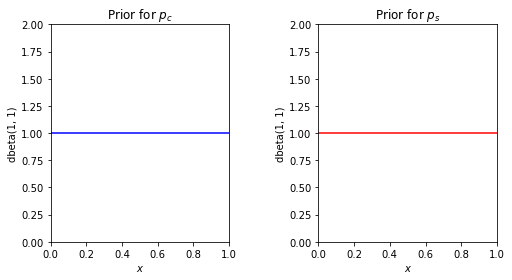

In [4]:
#%matplotlib inline
import numpy as np
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
from scipy.stats import beta

fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(wspace=0.5)

x = np.linspace(0, 1, 1002)[1:-1]
beta_prior = beta(1, 1)

ax = fig.add_subplot(1, 2, 1, xlabel=r'$x$', ylabel='dbeta(1, 1)',
                     xlim=(0, 1), ylim=(0, 2), title=r'Prior for $p_c$')
ax.plot(x, beta_prior.pdf(x), c='blue', label=r'$\alpha=1,\ \beta=1$')

ax = fig.add_subplot(1, 2, 2, xlabel=r'$x$', ylabel='dbeta(1, 1)',
                     xlim=(0, 1), ylim=(0, 2), title=r'Prior for $p_s$')
ax.plot(x, beta_prior.pdf(x), c='red', label=r'$\alpha=1,\ \beta=1$')

plt.show()

Now suppose we have 7 likes and 8 dislikes for cost and 3 likes and 1 dislike for screen and 7 likes.  Then, the posterior
of $p_c | x$ is a Beta($8, 9$) distribution and $p_s | x$ is a Beta($4, 2$) distribution.  Graphically, we have the following.

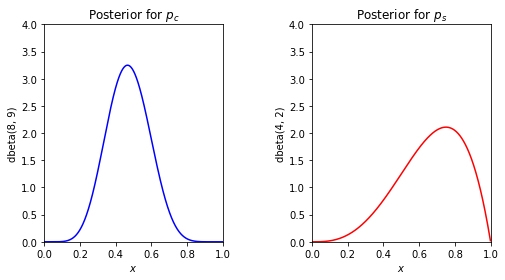

In [5]:
fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(wspace=0.5)

# Cost - Beta(8, 9)
ax = fig.add_subplot(1, 2, 1, xlabel=r'$x$', ylabel='dbeta(8, 9)',
                     xlim=(0, 1), ylim=(0, 4), title=r'Posterior for $p_c$')
ax.plot(x, beta(8, 9).pdf(x), c='blue', label=r'$\alpha=1,\ \beta=1$')

# Cost - Beta(4, 2)
ax = fig.add_subplot(1, 2, 2, xlabel=r'$x$', ylabel='dbeta(4, 2)',
                     xlim=(0, 1), ylim=(0, 4), title=r'Posterior for $p_s$')
ax.plot(x, beta(4, 2).pdf(x), c='red', label=r'$\alpha=1,\ \beta=1$')

plt.show()

Since the variance (or spread) for screen is larger, we may want to obtain more observations related to screen.

---
## Multinomial Data - Multi-level Ratings

Suppose that users can rate $1, 2, \ldots,$ or $k$ stars for each product's attribute, i.e. $k$ categories. Notate $(x_1, x_2, \ldots, x_k)$ as above categories' counts, $n = \Sigma {x_i}$. Our main interest is vector $p = (p_1, p_2, \ldots, p_k)$ that represents the probability (degree of belief) that users rate $1, 2, \ldots, k$ stars respectively. 

Suppose the prior distribution for $p = (p_1, p_2, \ldots, p_k)$ is Dirichlet of order $k \geq 2$ with parameters $\alpha_1, \alpha_2, \ldots, \alpha_k > 0$:
$$g(p) = \frac{1}{B(\alpha)} \prod_{i=1}^{k} p_i^{\alpha_i - 1}$$
and the likelihood $f(x | p)$ is multinomial distribution:
$$f(x|p) = \frac{n!}{x_1! \ldots x_k!} \prod_{i=1}^{k} p_i^{x_i}$$

Therefore we have the posterior:
$$h(p|x) \varpropto f(x|p)g(p) = \frac{n!}{x_1! \ldots x_k!} \times \frac{1}{B(\alpha)} \times \prod_{x=1}^{k} p_i^{x_i + \alpha_i - 1}$$
This is also a Dirichlet distribution with parameter $(x_1 + \alpha_1, \ldots, x_k + \alpha_k)$ that have the mean:
$$E[p_i|x] = \frac{x_i + \alpha_i}{\Sigma_{i=1}^{k} {(x_i + \alpha_i)} }$$
and variance:
$$Var[p_i|x] = \frac{\alpha_i(\alpha_0 - \alpha_i)}{\alpha_0^2(\alpha_0 + 1)}$$
where $\alpha_0 = \Sigma_{i=1}^{k} \alpha_i$, and co-variance:
$$Cov[p_i, p_j|x] = \frac{-\alpha_i \alpha_j}{\alpha_0^2(\alpha_0 + 1)}$$
__Note:__ covariance matrix is not invertible, thus have determinant $0$

For our purpose, we can consider the attribute that have small $\Sigma_i Var[p^i|x]$ to be stable. In another word, asking incoming users about an attribute that maximize $\Sigma_i Var[p^i|x]$.

### Toy example
Consider 2 cell phone traits again: **cost** and **screen**. This time, users can rate with $1, 2$ or $3$ stars. Suppose $p_c^1, p_c^2$ and $p_c^3$ are the probabilities of rating the cost with $1, 2$ and $3$ stars, $p_c^1 + p_c^2 + p_c^3 = 1$. Similarly, we have $p_s^1, p_s^2$ and $p_s^3$ for screen. Again, we do Bayesian inference for $p_c^i$ and $p_s^i$ with uniform prior, or Dirichlet distribution with all $\alpha_i$ to be the same $\alpha_i = \alpha = 1$.

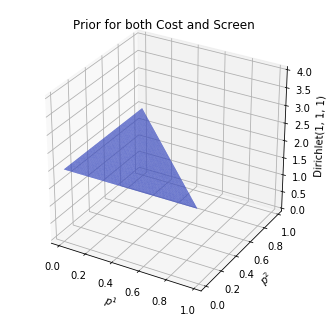

In [6]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import scipy.stats as stats


def dirichlet_coord(a1, a2, a3):
    x, y = np.mgrid[0.01:1:0.01, 0.01:1:0.01]
    x = x.flatten()
    y = y.flatten()
    xy = x + y
    x = x[xy < 1]
    y = y[xy < 1]
    xy_remain = 1 - (x + y)
    z = [stats.dirichlet.pdf([x[i], y[i], xy_remain[i]], [a1, a2, a3])
         for i in range(len(x))]
    z = np.array(z)
    return (x, y, z)

fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.gca(projection='3d', xlabel=r'$p^1$', ylabel=r'$p^2$',
             zlabel='Dirichlet(1, 1, 1)', zlim=(0, 4),
             title='Prior for both Cost and Screen', zmargin=1)
x, y, z = dirichlet_coord(1, 1, 1)
ax.plot_trisurf(x, y, z, cmap=cm.coolwarm, linewidth=0.0, antialiased=True)
plt.show()

We suppose that we have 4, 9, 20 ratings of 1, 2, 3 stars respectively for cost and 2, 4, 8 ratings of 1, 2, 3 stars respectively for screen. Then the posterior of the cost $h(p_c|x)$ and screen $h(p_s|x)$ are respectively Dirichlet(5, 10, 21) and Dirichlet(3, 5, 9). Consider variance for the cost:
$$\alpha_0 = \Sigma \alpha_i = 5 + 10 + 21 = 36$$
$$Var[p_c^1|x] = \frac{\alpha_1(\alpha_0 - \alpha_1)}{\alpha_0^2(\alpha_0 + 1)}=\frac{5\times 31}{36^2 \times 37} = 0.003,\qquad
Var[p_c^2|x] = \frac{10\times 26}{36^2 \times 37} = 0.005, \qquad
Var[p_c^3|x] = \frac{21\times 15}{36^2 \times 37} = 0.007$$
$$\Sigma_{i} Var[p_c^i|x] = 0.015$$

Similarly for the screen:
$$\alpha_0 = \Sigma \alpha_i = 3 + 5 + 9 = 17$$
$$Var[p_s^1|x] =\frac{3\times 14}{17^2 \times 18} = 0.008,\qquad
Var[p_s^2|x] =\frac{12\times 5}{17^2 \times 18} = 0.012,\qquad
Var[p_s^3|x] =\frac{9\times 8}{17^2 \times 18} = 0.014$$
$$\Sigma_{i} Var[p_s^i|x] = 0.034$$

In [7]:
from numpy import linalg as LA

def dirich_cov(alphas):
    """Dirichlet distribution's covariances matrix.
    
    Diagonal is filled by variance instead.
    Returns:
        cov - numpy matrix (array)
    """
    alphas = np.array(alphas)
    dim = alphas.shape[0]
    a0 = sum(alphas)
    denom = a0 ** 2 * (a0 + 1)   
    cov = - alphas.reshape(dim, 1).dot(alphas.reshape(1, dim)) / denom
    np.fill_diagonal(cov, alphas * (a0 - alphas) / denom)

    return cov

def dirichlet_sum_square_covars(alphas):
    cov = dirich_cov(alphas)
    squared_cov = cov ** 2
    return sum(squared_cov.flatten())

def weighted_sum_dirichlet_vars(alphas,
                                prior_count=None, prior_cost=None):
    sum_dirichlet_vars = sum(stats.dirichlet.var(alphas))
    if not prior_count or not prior_cost:
        prior_count = len(alphas)
        prior_cost = sum(stats.dirichlet.var([2] * prior_count))
    
    count = sum(alphas) - len(alphas)
    weighted_sum = (count * sum_dirichlet_vars + prior_count * prior_cost) / \
                    (count + prior_count)
    return weighted_sum

def first_eigen_values_of_covars_matrix(alphas):
    covars = dirich_cov(alphas)
    w, _ = LA.eig(covars)
    max_abs_index = np.argmax(np.absolute(w))
    return w[max_abs_index]

def criteria(attribute, alphas):
    print('Criteria of {}:'.format(attribute))
    print('    Variance: Sum = {:.3f}, Max = {:.3f}, Weighted_Sum_Uniform = {:.3f}, '
          'Weighted_Sum_Ave = {:.3f}'.format(
              sum(stats.dirichlet.var(alphas)),
              max(stats.dirichlet.var(alphas)),
              weighted_sum_dirichlet_vars(alphas),
              weighted_sum_dirichlet_vars(alphas, prior_count=70, prior_cost=sum(stats.dirichlet.var([21, 11, 41])))))
    print('    Covariance matrix: Sum of squared = {:.5f}, Most significant eigenvalue = {:.3f}'.format(
        dirichlet_sum_square_covars(alphas), first_eigen_values_of_covars_matrix(alphas)))
    print()

criteria('Cost', [5, 10, 21])
criteria('Screen', [3, 5, 9])

Criteria of Cost:
    Variance: Sum = 0.015, Max = 0.007, Weighted_Sum_Uniform = 0.022, Weighted_Sum_Ave = 0.010
    Covariance matrix: Sum of squared = 0.00013, Most significant eigenvalue = 0.011

Criteria of Screen:
    Variance: Sum = 0.033, Max = 0.014, Weighted_Sum_Uniform = 0.044, Weighted_Sum_Ave = 0.012
    Covariance matrix: Sum of squared = 0.00061, Most significant eigenvalue = 0.022



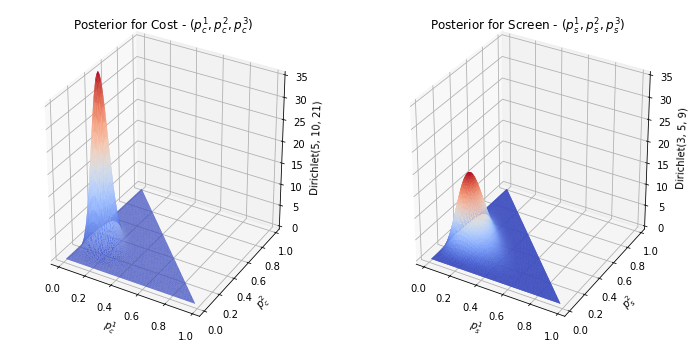

In [8]:
fig = plt.figure(figsize=(12, 6))

# Cost
ax = fig.add_subplot(1, 2, 1, projection='3d',
                     xlabel=r'$p_c^1$', ylabel=r'$p_c^2$',
                     zlabel='Dirichlet(5, 10, 21)', zlim=(0, 35),
                     title=r'Posterior for Cost - $(p_c^1, p_c^2, p_c^3)$')
x, y, z = dirichlet_coord(5, 10, 21)
ax.plot_trisurf(x, y, z, cmap=cm.coolwarm, linewidth=0.0, antialiased=True)

# Screen
ax = fig.add_subplot(1, 2, 2, projection='3d',
                     xlabel=r'$p_s^1$', ylabel=r'$p_s^2$',
                     zlabel='Dirichlet(3, 5, 9)', zlim=(0, 35),
                     title='Posterior for Screen - $(p_s^1, p_s^2, p_s^3)$')
x, y, z = dirichlet_coord(3, 5, 9)
ax.plot_trisurf(x, y, z, cmap=cm.coolwarm, linewidth=0.0, antialiased=True)

ax.plot_trisurf(x, y, z, cmap=cm.coolwarm, linewidth=0.0, antialiased=True)
plt.show()

Note that $p_c^3 = 1 - p_c^1 - p_c^2$ and $p_s^3 = 1 - p_s^1 - p_s^2$. Taking into account that the variance for screen is larger, we can ask users more questions about it.

To investigate the effect of different optimized criteria, consider 2 other attributes that have the same number of ratings as the Cost:
* **battery** got $11$ ratings for each level $1, 2, 3$ stars.
* **weight** got all $33$ ratings for $3$ stars and no ratings for $1, 2$ stars.

Similarly the posterior for battery $h(p_b|x)$ is Dirichlet(12, 12, 12), for weight $h(p_w|x)$ is Dirichlet(1, 1, 34).

Furthermore, consider another attribute, for instance **design**, with $0, 0, 11$ ratings for $1, 2, 3$ stars respectively. Then this attribute's posterior has the smaller sum of variance than cost and battery that have the number of ratings 3 times larger (33 ratings).

In [9]:
print('average_prior_count = 70, average_prior_cost (20, 10, 40) = {:.3f}'.format(
        sum(stats.dirichlet.var([21, 11, 41]))))
print('uniform_prior_count = 3, average_prior_cost (1, 1, 1) = {:.3f}'.format(
        sum(stats.dirichlet.var([2, 2, 2]))))

average_prior_count = 70, average_prior_cost (20, 10, 40) = 0.008
uniform_prior_count = 3, average_prior_cost (1, 1, 1) = 0.095


In [10]:
criteria('Cost', [5, 10, 21])
criteria('Screen', [3, 5, 9])
criteria('Battery', [12, 12, 12])
criteria('Weight', [1, 1, 34])
criteria('Design', [1, 1, 12])
criteria('Durability', [1, 1, 4])

Criteria of Cost:
    Variance: Sum = 0.015, Max = 0.007, Weighted_Sum_Uniform = 0.022, Weighted_Sum_Ave = 0.010
    Covariance matrix: Sum of squared = 0.00013, Most significant eigenvalue = 0.011

Criteria of Screen:
    Variance: Sum = 0.033, Max = 0.014, Weighted_Sum_Uniform = 0.044, Weighted_Sum_Ave = 0.012
    Covariance matrix: Sum of squared = 0.00061, Most significant eigenvalue = 0.022

Criteria of Battery:
    Variance: Sum = 0.018, Max = 0.006, Weighted_Sum_Uniform = 0.024, Weighted_Sum_Ave = 0.011
    Covariance matrix: Sum of squared = 0.00016, Most significant eigenvalue = 0.009

Criteria of Weight:
    Variance: Sum = 0.003, Max = 0.001, Weighted_Sum_Uniform = 0.011, Weighted_Sum_Ave = 0.006
    Covariance matrix: Sum of squared = 0.00001, Most significant eigenvalue = 0.002

Criteria of Design:
    Variance: Sum = 0.017, Max = 0.008, Weighted_Sum_Uniform = 0.034, Weighted_Sum_Ave = 0.009
    Covariance matrix: Sum of squared = 0.00017, Most significant eigenvalue = 0.0

[comment]: $$Var[p_b^i|x] = \frac{12\times 24}{36^2 \times 37} = 0.006, \Sigma_i Var[p_b^i|x] = 0.018$$
[comment]: $$Var[p_w^3|x] = \frac{34\times 2}{36^2 \times 37} = 0.0014, Var[p_w^1|x] = Var[p_w^2|x] = 0.0007, \Sigma_i Var[p_w^i|x] = 0.003$$
[comment]: $$\Sigma_i Var[p_w^i|x] < \Sigma_i Var[p_c^i|x] < \Sigma_i Var[p_b^i|x]$$

|Property | Weight | Cost | Battery | Design | Durability |
|:-------:|:------:|:----:|:-------:|:------:|:----------:|
|Ratings (1, 2 or 3 stars)  |0, 0, 33|4, 9, 20|11, 11, 11|0, 0, 11 (only 11 ratings)|0, 0, 3|
|Sum of Variance (SoV)|0.003 | 0.015 | **0.018**|0.017|0.071|
|Weighted SoV wt uniform: m=3, $V_0$=0.095|0.011 | 0.022 | 0.024 |0.034|0.083|
|Weighted SoV wt average: m=70, $V_0$=0.008|0.006 | 0.010 | 0.011 |0.009|0.010|
|Maxium of Variance|0.001 | **0.007** | 0.006|**0.008**|0.032|
|Sum of Squared Covariance|0.00001|0.00013|**0.00016**|**0.00017**|0.00283|
|Largest Eigenvalue of Covariance Matrix|-0.024|-0.012|-0.009|-0.050|-0.071|

**Interpretation**:
* Cost and Battery has way more ratings than Screen, thus more stable than Screen.
* Cost, Battery and Weight have the same number of ratings but Cost's variance is a little bit smaller (less spreading) than Battery's variance, while Weight's variance is way the smallest.
* Sum of variance seems to be a good criteria regarding to optimizing rating's polarization.
* Covariance doesn't make sense in this case since it captures the linear relationship between two probabilities (e.g., $p_c^2, p_c^3$)

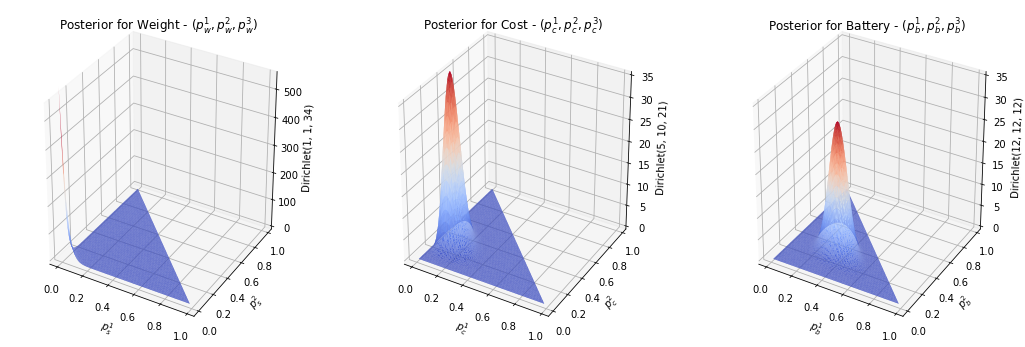

In [11]:
fig = plt.figure(figsize=(18, 6))

# Weight
ax = fig.add_subplot(1, 3, 1, projection='3d',
                     xlabel=r'$p_s^1$', ylabel=r'$p_s^2$',
                     zlabel='Dirichlet(1, 1, 34)', zlim=(0, 550),
                     title='Posterior for Weight - $(p_w^1, p_w^2, p_w^3)$')
x, y, z = dirichlet_coord(1, 1, 34)
ax.plot_trisurf(x, y, z, cmap=cm.coolwarm, linewidth=0.0, antialiased=True)

# Cost
ax = fig.add_subplot(1, 3, 2, projection='3d',
                     xlabel=r'$p_c^1$', ylabel=r'$p_c^2$',
                     zlabel='Dirichlet(5, 10, 21)', zlim=(0, 35),
                     title=r'Posterior for Cost - $(p_c^1, p_c^2, p_c^3)$')
x, y, z = dirichlet_coord(5, 10, 21)
ax.plot_trisurf(x, y, z, cmap=cm.coolwarm, linewidth=0.0, antialiased=True)

# Battery
ax = fig.add_subplot(1, 3, 3, projection='3d',
                     xlabel=r'$p_b^1$', ylabel=r'$p_b^2$',
                     zlabel='Dirichlet(12, 12, 12)', zlim=(0, 35),
                     title='Posterior for Battery - $(p_b^1, p_b^2, p_b^3)$')
x, y, z = dirichlet_coord(12, 12, 12)

ax.plot_trisurf(x, y, z, cmap=cm.coolwarm, linewidth=0.0, antialiased=True)
plt.show()

---
## Open for discussion
So far, we have a nice framework for estimating the certainty of $p_c^1, p_c^2, p_c^3$ of an attribute. The simplest criterion for choosing an attribute to ask users is the variance's sum: $\Sigma_i p_c^i$. That simple criterion surprisingly is the best at this moment. The criterion of covariance matrix's determinant is ruled out since it's $0$ for all cases (covariance matrix is not invertible). However, there are other aspects worth considering as below.

### Some attributes are more important and keep asking a rare feature is actually wasting
On the other side, the important attributes are normalled got many ratings already. In another word, importance and variance is somewhat inversally proportional. We need a way to balance the role of these two objectives. A good candidate is using [Baysian Average](https://en.wikipedia.org/wiki/Bayesian_average) that is also utilized in [IMDB rating](http://www.imdb.com/help/show_leaf?votestopfaq):

$$\text{weighted rating } (WR) = \frac{v \times R + m \times C}{v + m}$$

Where: 
* $R$ = average for the movie (mean) = (Rating)
* $v$ = number of votes for the movie = (votes)
* $m$ = minimum votes required to be listed in the Top 250
* $C$ = the mean vote across the whole report (global average)

[A nice explaination here - Of Bayesian average and star ratings](http://fulmicoton.com/posts/bayesian_rating/)

[How to Count Thumb-Ups and Thumb-Downs: User-Rating based Ranking of Items from an Axiomatic Perspective](http://www.dcs.bbk.ac.uk/~dell/publications/dellzhang_ictir2011.pdf)

[Hacker News](https://news.ycombinator.com/item?id=3792627)

The adapted formula for weighted sum of variance of a feature can be:
$$\text{weighted variance } (WV) = \frac{r \times V  + m \times V_0}{r + m}$$
Where:
* $r = $ number of ratings
* $V = $ sum of variance
* $m = $ prior number of ratings every feature get, e.g. in Edmund dataset, $m$ can be 5, i.e. each star get 1 vote.
* $V_0 = $ prior (global) sum of variance for every feature, e.g. in Edmund dataset, $V_0$ is computed in the case each star get 1 vote.

**Problem**: considering two attributes in Edmunds dataset *interior* (popular) and *technology* (rare). Even though WR helps to alleviate the problem, at some points $WR_{technology} > WR_{popular}$. At that point, we will keep asking about attribute *technology* without receiving answer.

**My solution**: assign each attribute a probability of receiving answer, let say $ap_{technology}$, then
$$WR(technology) = ap_{technology} \times C_{technology}$$
And updating $ap_{technology}$ after each times asked. For example: $ap = \frac{answer}{no\_answer + answer}$. It can be smoothed by $ap = \frac{answer + m}{no\_answer + answer + m}$, where $m$ is a constant.

### Attributes are correlated.
Ratings of an attribute somewhat imply about its correlated attributes.
* ~~How about [cross-covariance](https://en.wikipedia.org/wiki/Cross-covariance)? Considering that each feature has a random variable vector, e.g.: $p_s = (p_s^1, p_s^2, p_s^3)$ for screen. Then, we "can" evaluate cross-covariance between $p_s$ of cost and $p_b$ of brightness: $Cov(p_s, p_b)$. However I couldn't find any sources about computing  it for Dirichlet distribution.~~
* ~~Another option is [Grouped Dirichlet Distribution (GDD)](https://en.wikipedia.org/wiki/Grouped_Dirichlet_distribution) that can be used to estimate the variance of probability (screen=3\*, brightness=3\*) - $p_{cost=3, design=2}$. A nice thing about GDD is that GDD is also a natural conjugate prior with appropriate likelihood [Grouped Dirichlet distribution: A new tool for incomplete categorical data analysis](http://www.sciencedirect.com/science/article/pii/S0047259X07000127). However, more thought is needed to make use of the variance of probability (Cost=3\*, Brightness=2\*).~~
* Estimate conditional probability of two features, e.g. $P(screen = 3 | brightness = 3)$. Need to check reviews that contains both these features. Then how does this conditional probability help us?

#### Sum of variances in the big picture

Reviewing our framework, we look at the probabilities that a feature is rated with a specific number of star (1 star, 2 stars, and so on). For instance, considering feature *screen*, we are interested in random variables: $S_1$ (prob. of $screen = 1*$), $S_2$ (prob. of $screen = 2*$), $S_3$ (prob. of $screen = 3*$) and actually $S = S_1 + S_2 + S_3$. In our Bayesian inference, $S_1$, $S_2$ and $S_3$ follow Beta distributions. $S$ has the expected value $E(S) = E(S_1) + E(S_2) + E(S_3) = 1$. However, we concern more at the variance of $S$ that indicates the certainty about screen's ratings. 
$$Var(S) = Var(\sum_{i=1}^{3} S_i) = \sum_{i=1}^{3} Var(S_i) +  2 \sum_{i<j} Cov(S_i, S_j)$$
The following table demonstrate the **Covariance (CoV)** matrix of rating features (e.g., screen, brightness) 1, 2 or 3 stars. So far, our framework ignores feature dependencies by only taking into account sub-matrices *CoV[1:3, 1:3]* - only screen, *Cov[4:6, 4:6]* - only brightness, and so on. Actually, we even simply them by their diagonal only: $\sum_{i=1}^{3} Var(S_i)$. (note that $Var(S_i) = CoV(S_i, S_i)$)

More general framework with feature dependencies consideration should look at other cells too. For example, *CoV[1:3, 4:6]* (or symmetrically *Cov[4:6, 1:3]*) represents the relation between 2 features screen and brightness. Ideally, if customers who rate screen 3\* also rate brightness 3\* and vice verse, then we would expect a correlation metric with value 1 (identical) for these two ratings.
$$CoV(S, B) = Cov(\sum_i S_i, \sum_i B_i) = \sum_{i, j} Cov(S_i, B_j)$$

|Covariance   |  |       1      |     2      |     3      |     4          |        5       |       6        |  ... |
|:---||:--------:|:----------:|:-------------:|:----------:|:--------------:|:-------------:|:--------------:|:-----:|
|  |             | Screen-1\*   | Screen-2\* | Screen-3\* | Brightness-1\* | Brightness-2\* | Brightness-3\* | ... |
|1 |Screen-1\*   | $Var_{Screen-1*}$ |||||||
|2 |Screen-2\*   | |$Var_{Screen-2*}$ ||||||
|3 |Screen-3\*   ||| $Var_{Screen-3*}$ |||||
|4 |Brightness-1\*|$Covar_{Brightness-1* \times Screen-1*}$|||$Var_{Brightness-1*}$ ||||
|5 |Brightness-2\*| ||||$Var_{Brightness-2*}$ |||
|6 |Brightness-3\*| |||||$Var_{Brightness-3*}$ ||
|...|...||||||||

Current Scoring function: 
$$score(S) = \sum_i Var(S_i)$$

Better Scoring function: 
$$score(S) = Var(S) = Var(\sum_i S_i) = \sum_i Var(S_i) +  2 \sum_{i<j} Cov(S_i, S_j)$$

Even better scoring function: 
$$score(S) = min \left\{
    \begin{array}{l}
        Var(S) \\
        \frac{Var(B)}{\vert Cor(Screen, Brightness) \vert}
    \end{array}
\right.
$$

**Question: how to compute $Cor(Screen, Brightness)$ ???**

#### Attribute's rating as a single random variable

Looking from a different angle, expected attribute's ratings $r$ is the only random variable of interest. $r$ can take different value 1, 2 or 3 stars. Then, **expected rating $r = E[\#stars] = \sum_i ip_i$**. The difference of this approach with using sum of variance is illustrated in following scenario:

|             | 1\*   |  2\*  |  3\*  |
|:-----------:|:-----:|:-----:|:-----:|
| Attribute 1 |5 votes|       |5 votes|
| Attribute 2 |       |5 votes|5 votes|
While sum of variance considers 2 attributes as the same, variance of expected rating favors attribute 2 (less variance/spreading around mean $r = 2.5$).

Following the same Bayesian inference as previous, we have:
\begin{align}
E[r|x] &= E[\sum_i ip_i|x] = E[1p_1 + 2p_2 + 3p_3|x] \\
       &= i\sum_i E[p_i|x] = 1 \times E[p_1|x] + 2 \times E[p_2|x] + 3 \times E[p_3|x]\\
Var[r|x] &= Var[\sum_i ip_i|x] = Var[1p_1 + 2p_2 + 3p_3|x] \\
         &= \sum_i i^2 Var(p_i|x) + 2 \sum_{i <j} ij Cov(p_i, p_j|x)
\end{align}

Covariance between 2 attributes *r, s* will be
\begin{align}
Cov(r, s|x) &= Cov(\sum_i ip_i^r, \sum_i ip_i^s|x) \\
            &= \sum_{i, j}{ijCov(p_i^r, p_j^s|x)} \\
            &= \sum_{i, j}{ij(E[p_i^r p_j^s|x] - E[p_i^r|x] E[p_j^s|x])} \\
\end{align}
Now we can compute Pearson correlation by:
$$Cor(r, s) = \frac{Cov(r, s|x)}{\sqrt{Var[r|x] \times Var[s|x]}}$$

*However, we are now stuck at computing $E[p_i^r p_j^s|x]$. The main issue is that we are considering probabilities of different attributes $p^r, p^s, \ldots$, seperately. Hence, it's impossible to estimate the joint probability of pairs of attributes.*

*$\Rightarrow$ Backup plan: seperating 2 factors in our scoring function: attribute's variance (uncertainty) and attributes' dependency. To simplify the problem, these 2 tasks can be treated differently.*

In [12]:
def var_of_erating(alphas):
    """Var(r|x) = Var(E[\#stars])"""
    alphas = np.array(alphas)
    n = alphas.shape[0]
    en_covs = dirich_cov(alphas)
    coeff = np.arange(1, alphas.shape[0] + 1, 1)
    coeff = coeff.reshape(n, 1).dot(coeff.reshape(1, n))
    result = sum(sum(coeff * en_covs))
    return result

print('Var of expected rating of Cost: {:.3f}'.format(var_of_erating([5, 10, 21])))
print('Var of expected rating of Screen {:.3f}'.format(var_of_erating([3, 5, 9])))
print('Var of expected rating of Battery {:.3f}'.format(var_of_erating([12, 12, 12])))
print('Var of expected rating of Weight {:.3f}'.format(var_of_erating([1, 1, 34])))
print('Var of expected rating of Design {:.3f}'.format(var_of_erating([1, 1, 12])))
print('Var of expected rating of Durability {:.3f}'.format(var_of_erating([1, 1, 4])))

Var of expected rating of Cost: 0.014
Var of expected rating of Screen 0.032
Var of expected rating of Battery 0.018
Var of expected rating of Weight 0.004
Var of expected rating of Design 0.021
Var of expected rating of Durability 0.083


Let update our previous table using variance of expected rating as attribute's scoring function ($Var[r|x] = Var[\sum_i ip_i|x]$), :

|Property | Weight | Cost | Battery | Design | Durability |
|:-------:|:------:|:----:|:-------:|:------:|:----------:|
|Ratings (1, 2 or 3 stars)  |0, 0, 33|4, 9, 20|11, 11, 11|0, 0, 11 (only 11 ratings)|0, 0, 3|
|Sum of Variance (SoV)|0.003 | 0.015 | **0.018**|0.017|0.071|
|Weighted SoV wt uniform: m=3, $V_0$=0.095|0.011 | 0.022 | 0.024 |0.034|0.083|
|Weighted SoV wt average: m=70, $V_0$=0.008|0.006 | 0.010 | 0.011 |0.009|0.010|
|Sum of Squared Covariance|0.00001|0.00013|**0.00016**|**0.00017**|0.00283|
|**Variance of expected rating (VER)**|0.004 | 0.014 | **0.018**|0.021|**0.083**|
In this table, Var of expected rating (VER) is consistent with using sum of variance (SoV)

#### Correlation by feature-pairwise probability estimation

To estimate correlation between 2 features, we need to look at the features at the same time. The following table represents the number of time that users rate 2 features in the same review.

|        | Cost-1\*        | Cost-2\*        | Cost-3\*        |    |
|:------:|:-----------------:|:-----------------:|:-----------------:|    |
|Screen-1\*|3 $(n_{11}, p_{11})$|2 $(n_{12}, p_{12})$|0 $(n_{13}, p_{13})$| 5 |
|Screen-2\*|1 $(n_{21}, p_{21})$|5 $(n_{22}, p_{22})$|2 $(n_{23}, p_{23})$| 8 |
|Screen-3\*|1 $(n_{31}, p_{31})$|4 $(n_{32}, p_{32}$|7 $((n_{33}, p_{33})$| 12 |
|          |5 |11 | 9 

$n_{ij}, p_{ij}$ are respectively the number of reviews, probability users rate 'screen' $i*$, 'cost' $j*$ at the same time. Using a similar Bayesian inference approach we can model $p_{ij}$ by a Dirichlet distribution that gives us: $E[p_{ij}], Var[p_{ij}]$ and $Cov(p_{ij}, p_{tk}$. Let utilize this information to model $Cor(p^{screen}, p^{cost})$. First of all:
\begin{align*}
p_i^s &= \sum_j p_{ij} = p_{i1} + p_{i2} + p_{i3} \\
p_k^c &= \sum_t p_{tk} = p_{1k} + p_{2k} + p_{3k} \\
\Rightarrow Cov(p_i^s, p_k^c) &= Cov(\sum_j p_{ij}, \sum_t p_{tk}) = \sum_{j, t} Cov(p_{ij}, p_{tk}) \\
Var(p_i^s) &= Var(\sum_j p_{ij}) = \sum_j Var(p_{ij}) + 2\sum_{j<k} Cov(p_{ij}, p_{ik}) \\
Var(p_k^c) &= Var(\sum_t p_{tk}) = \sum_t Var(p_{tk}) + 2\sum_{t<j} Cov(p_{tk}, p_{jk})
\end{align*}
Now we have:
\begin{align*}
r^{screen} &= \sum_i ip_i^s = \sum_i \sum_j ip_{ij} = \sum_i \sum_j ip_{ij} \\
r^{cost} &= \sum_k kp_k^s = \sum_k \sum_t kp_{tk} = \sum_k \sum_i kp_{tk} \\
\Rightarrow Cov(r^s, r^c) &= Cov(\sum_i ip_i^s, \sum_k kp_k^c) \\
              &= \sum_{i, k} ikCov(p_i^s, p_k^c) \\
              &= \sum_{i, k} ik\sum_{j, t} Cov(p_{ij}^s, p_{tk}^c) = \sum_{i, k} \sum_{j, t} ikCov(p_{ij}^s, p_{tk}^c) \\
            Var(r^s) &= Var(\sum_i ip_i^s) = \sum_i i^2Var(p_i^s) + 2\sum_{i<j} ijCov(p_i^s, p_j^s) \\
            Var(r^c) &= Var(\sum_k kp_k^c) = \sum_k k^2Var(p_k^c) + 2\sum_{k<t} ktCov(p_k^c, p_t^c) \\
\end{align*}

Then, using Pearson correlation:
$$pearson\_cor(screen, cost) = \frac{cov(r^s, r^c)}{\sqrt{Var(r^s) \times Var(r^c)}}$$

Until now, we will pick feature (one-by-one) which has the highest score (lost/uncertainty) according to:
$$score(S) = min \left\{
    \begin{array}{l}
        \frac{Var(s)}{\vert Cor(r^s, r^s) \vert} = Var(s)\\
        \frac{Var(c)}{\vert Cor(r^s, r^c) \vert} \\
        \frac{Var(c^\prime)}{\vert Cor(r^s, r^{c^\prime}) \vert} \\
        \ldots
    \end{array}
\right.
$$

So the question is where does the numerator $Var(c)$ come from? By our previous (individual feature) modeling or by the contigency count table? My personal view: from previous modeling. The reason is:
* We have more data on individual feature modeling (versus contigency count table that is limited, sparse).
* It reflects our intuition that when considering feature *screen*, if we know about *brightness* and these 2 features are highly correlated, then we should utilized our knowledge of *brightness* to predict *screen*.

This scoring function can be utilized to pick a set of features in both styles: in batch (pick a set at once, e.g. for desktop/laptop webpage) or in stream (one feature by another, e.g. mobile phone that has limited space). In the scenario of asking feature one-by-one on mobile phone, our Bayesian inference manner's simplicity and speed allow **re-calculating/updating** feature's scores after receiving a previous feature's answer.

In [19]:
# Simple implematation: no vectorization
def fat_idx(row_idx, col_idx, dim):
    return row_idx * dim + col_idx

def simple_pearson_cor(count_table):
    d = count_table.shape[0]    # number of star levels
    param_table = count_table + 1
    
    fat_dirich_params = param_table.flatten()
    fat_vars = stats.dirichlet.var(fat_dirich_params)     # dim: d
    fat_covs = np.array(dirich_cov(fat_dirich_params))    # dim: d^2 * d^2
    
    row_var = np.zeros((d, 1))
    col_var = np.zeros((d, 1))
    for i in range(d):
        for j in range(d):
            for k in range(d):
                row_var[i, 0] += fat_covs[fat_idx(i, j, d), fat_idx(i, k, d)]
                col_var[i, 0] += fat_covs[fat_idx(j, i, d), fat_idx(k, i, d)]
           
    rc_cov = np.zeros((d, d))
    for i in range(d):
        for k in range(d):
            for j in range(d):
                for t in range(d):
                    row_idx = fat_idx(i, j, d)
                    col_idx = fat_idx(t, k, d)
                    rc_cov[i, k] += fat_covs[row_idx, col_idx]
    
    rr_cov = np.zeros((d, d))
    cc_cov = np.zeros((d, d))
    for i in range(d):
        for k in range(d):
            if i == k:
                rr_cov[i, k] = row_var[i, 0]
                cc_cov[i, k] = col_var[i, 0]
            else:
                for j in range(d):
                    for t in range(d):
                        rr_cov[i, k] += fat_covs[fat_idx(i, j, d), fat_idx(k, t, d)]
                        cc_cov[i, k] += fat_covs[fat_idx(j, i, d), fat_idx(t, k, d)]
    
    rvar = 0
    cvar = 0
    for i in range(d):
        for j in range(d):
            rvar += (i + 1) * (j + 1) * rr_cov[i, j]
            cvar += (i + 1) * (j + 1) * cc_cov[i, j]
    
    cov = 0
    for i in range(d):
        for k in range(d):
            cov += (i + 1) * (k + 1) * rc_cov[i, k]
            
    print("rvar = {:.4f}, cvar = {:.4f}, cov = {:.4f}".format(rvar, cvar, cov))
    
    return cov / np.sqrt(rvar * cvar)

sc_ct = np.array([[7, 2, 0],
                  [1, 7, 2],
                  [1, 4, 7]])

print("Pearson correlation = {:.4f}".format(simple_pearson_cor(sc_ct)))

rvar = 0.0163, cvar = 0.0146, cov = 0.0079
Pearson correlation = 0.5128


In [20]:
def row_vars(param_table):
    k = param_table.shape[0]    # number of star levels
    fat_dirich_params = param_table.flatten()
    fat_vars = stats.dirichlet.var(fat_dirich_params)     # dim: k
    cell_vars = fat_vars.reshape(k, k)                    # dim: k * k
    fat_covs = np.array(dirich_cov(fat_dirich_params))    # dim: k^2 * k^2
    
    row_vars = np.zeros(k)
    for i in range(k):
        block_covs = fat_covs[i * k: (i + 1) * k, i * k: (i + 1) * k]
        row_vars[i] = np.sum(np.sum(block_covs))
    
    return row_vars

def pw_cov(count_table):
    """Pairwise covariance of 2 features"""
    pass

def pearson_cor(count_table):
    d = count_table.shape[0]    # number of star levels
    param_table = count_table + 1
    
    fat_dirich_params = param_table.flatten()
    fat_vars = stats.dirichlet.var(fat_dirich_params)     # dim: d
    fat_covs = np.array(dirich_cov(fat_dirich_params))    # dim: d^2 * d^2
       
    row_var = row_vars(param_table)
    row_var = row_var * np.arange(1, d + 1, 1)
    r_var = row_var.reshape(1, d).dot(row_var.reshape(d, 1))
    col_var = row_vars(param_table.transpose())
    col_var = col_var * np.arange(1, d + 1, 1)
    c_var = col_var.reshape(1, d).dot(col_var.reshape(d, 1))
    
    cell_cov = np.zeros((d, d))
    for i in range(d):
        for k in range(d):
            for j in range(d):
                for t in range(d):
                    row_idx = i * d + j
                    col_idx = t * d + k
                    cell_cov[i, k] += fat_covs[row_idx, col_idx]
    
    cov = 0
    for i in range(d):
        for k in range(d):
            cov += (i + 1) * (k + 1) * cell_cov[i, k]
    print(cov)

    return cov / np.sqrt(r_var * c_var)
    
    
sc_ct = np.array([[3, 2, 0],
                  [1, 5, 2],
                  [1, 4, 7]])

print(pearson_cor(sc_ct))
print(simple_pearson_cor(sc_ct))


0.00687098368759
[[ 11.17011801]]
rvar = 0.0181, cvar = 0.0164, cov = 0.0069
0.398482055455


### Dynamic features set
In many domains, such as Amazon reviews, product's features set is dynamic. Features are extracted from free-text reviews, so the features set grows gradually. Hence, in our framework, beside asking features, the system still need to support free-text reviews section that help adding new features.

[tripadvisor.com](https://www.tripadvisor.com/) has similar interface with what we imagine.
![tripadvisor.com review](figs/trip_advisor.svg 'Write a review on tripadvisor.com')

### Others

* Moreover, we also need to take into account the possibility that customers answer our question. Customers may not have the knowledge about that feature, or just don't want to talk about it. Let assume a possibility that customers answer as $p_a$.
* Another question is whether do we want to minimize cost $C$ as soon as possible or after a pre-defined $k$ reviews.

---
## Experimentation
### Basics - independent features
For picking questions/features, there are 3 ways:
1. **greedily_pick**: always pick the feature that has the highest cost (try to reduce).
2. **greedily_pick_prob**: pick features with probabilities proporitional to their costs.
3. **randomly_pick**: ask its name, disregard features' costs.

For each asked feature/question, there are 2 ways to answer using our real dataset:
1. **answer_in_time_order**: answer using reviews in chronological order. If the asked doesn't appear in answered review, consider as no answer.
2. **answer_by_gen**: generate answers using the product's rating distribution. Note: always get answer.
    * When we ask a customer for multiple features, it may be more plausible to answer by an updated distribution. That is after generating a feature's rate, update the distribution of the next feature's rate using conditional probability. Assuming that we need to generate answer for $screen$ and $brightness$. After generating the rating for $screen = 3$, generating the answer for $brightness$ using $P(brightness | screen = 3)$.

### Depedent features
We need to ask a user several features (at least 2) to capture features' correlation (fill the contigency table).

There should be 2 plots:
* one comparing an uncertainty metric.
* one comparing the number of users needed to ask to get the same level of uncertainty metric.

Beside above experiment, an extreme one can be used to demonstrate the features dependency issue. That is to only consider 2 features in which one is the other's replicate. For instance, there are only 2 feature *'cost'* and *'price'* that are highly correlated (actually the same). Intuitively, we only need to ask about either one to understand both.

### Uncertainty metric

Up to now, we optimize feature's (sum of) variance that we consider as uncertainty metric. However that's not so objective for experimentation. There are 2 ways to workaround:
* Design user survey with the help of Amazon Mechanical Turk $\rightarrow$ manually, complicated, expensive.
* Using another uncertainty metric $\rightarrow$ indicate that our method is robust even with other metric $\rightarrow$ let try this direction for now.

Make use of **Confidence Interval (CI)** as an **alternative** uncertainty metric:
* Use the average of all CI's lengths:
  * pick a confidence level (CL), e.g. $CL = 95\%$
  * calculate CI of each feature's expected rating using Student distribution (unknown standard deviation case)
* To count for dependent features, use [Confident Region](http://www.public.iastate.edu/~maitra/stat501/lectures/InferenceForMeans-Confidence.pdf) instead.

---
## References

A couple of resources are as follows.
1. [Dirichlet Distribution](https://en.wikipedia.org/wiki/Dirichlet_distribution)
2. [Bayesian Inference for Categorical Data Analysis](http://www.stat.ufl.edu/~aa/cda2/bayes.pdf)